# MODULOS ALC :) 

In [184]:
import numpy as np
import math 
import random 
import matplotlib.pyplot as plt
import seaborn as ss 

# Funciones Auxiliares: 

In [226]:
def esSimetrica(A, tol):
    A = np.array(A)
    if A.shape[0] != A.shape[1]:
        return False
    return np.allclose(A, A.T, atol=tol)

def esIdentidad(A): 
    for i in range(len(A)): 
        for j in range(len(A[i])): 
            if i == j and (error_relativo(A[i][j], 1.0) > 1e-15): 
                return False 
            elif i != j and (error_relativo(A[i][j], 0.0) > 1e-15):
                return False
    return True 
        
def matriz_vector_mult(A, v): # A @ v
    if not A or not v:
        return []
    
    resultado = [0.0 for _ in range(len(A))]
    
    for i in range(len(A)):
        for j in range(len(v)):
            resultado[i] += A[i][j] * v[j]
    
    return resultado

def matriz_mult(A, B): 
    A = np.array(A, dtype=float)
    B = np.array(B, dtype=float)
    
    filas_A, cols_A = len(A), len(A[0])
    filas_B, cols_B = len(B), len(B[0])
    
    resultado = [[0.0 for _ in range(cols_B)] for _ in range(filas_A)]
    
    for i in range(filas_A):
        for j in range(cols_B):
            for k in range(cols_A):
                resultado[i][j] += A[i][k] * B[k][j]
    
    return resultado


def sumatoria(a):
    suma = 0
    for i in range(len(a)): 
        suma += a[i]
    return suma

def traspuesta(A):
    if len(A) == 0 or len(A) ==1:
        return A
        
    res = []
    
    for i in range(len(A[0])):
         fila = []
         for j in range(len(A)): 
              fila.append(A[j][i])
         res.append(fila)
    return res 


def determinante(A):
    A = np.array(A) 
    
    if len(A) == 0:
        return 1 
    if len(A) != len(A[0]): 
        return 0 
    
    if len(A) == 1:
        return A[0][0]
    if len(A) == 2:
        return A[0][0] * A[1][1] - A[0][1] * A[1][0]
    
    det = 0
    for i in range(len(A[0])):
        submatriz = []
        for k in range(1, len(A)):
            fila = []
            for l in range(len(A)): 
                if l != i: 
                    fila.append(A[k][l])
            submatriz.append(fila)
            
        menor = determinante(submatriz)
        signo = (-1)**i 
        det += signo * A[0][i] * menor
    return det
    
def inversa(A):  
            A = np.array(A, dtype=float) 

            if len(A) != len(A[0]): 
                return None 
                
            if abs(determinante(A)) < 1e-12: 
                return None
                
            A_inv = np.eye(len(A))
            A_copia = A.copy()
                
            for i in range(len(A)): 
                if abs(A_copia[i][i]) < 1e-12:
                    res = False 
                    for k in range(i + 1, len(A)): 
                        if abs(A_copia[k][i]) > 1e-12:
                            A_copia[[i, k]] = A_copia[[k, i]]
                            A_inv[[i, k]] = A_inv[[k, i]]
                            res = True 
                            break
                    if not res: 
                          return None 
                
                pivote = A_copia[i][i]
                A_copia[i] = A_copia[i] / pivote
                A_inv[i] = A_inv[i] / pivote
                      
                for j in range(len(A)):

                    if j != i:  
                      coef = A_copia[j][i]  
                      A_copia[j] = A_copia[j] - coef*A_copia[i]
                      A_inv[j] = A_inv[j] - coef*A_inv[i]
            return A_inv

def norma2(a):
    suma = 0
    for i in range(len(a)):
        suma += (abs(a[i])**2)
    return (suma)**(1/2)

def producto(a, B):
    res = [0]*len(B) 
    for i in range(len(B)): 
        res[i] = B[i] * a 
    return res 

def producto_escalar(A, B):
    res = 0
    for i in range(len(A)): 
        res += (A[i]*B[i])
    return res 

def resta_vectores(v, w):
    res = [0]*len(v) 
    for i in range(len(res)): 
        res[i] = v[i] - w[i] 
    return res 


def multiplicarMv(A, v):
    n = len(A)
    resultado = [0] * n
    for i in range(n):
        for j in range(len(v)):
            resultado[i] += A[i][j] * v[j]
    return resultado

def productoInterno(a,b):
    res = 0
    for i in range(len(b)):
        res += a[i] * b[i]
    return res

def divisionVectorEscalar(a, b): 
  if b != 0:
    for i in range(len(a)): 
        a[i] = a[i] / b 
    return a 
  else: 
      return a 

def fAv(A, v): # fA2(v) 
    Av1 = multiplicarMv(A, v)
    v1 = divisionVectorEscalar(Av1,norma2(Av1))
    Av2 = multiplicarMv(A, v1) 
    return divisionVectorEscalar(Av2,norma2(Av2))

# MODULO 1
* funciones
1. error
2. error relativo
3. matrices iguales

* funciones aux
1. all_error 

In [190]:
def error(x,y):
    return abs(x-y)

def error_relativo(x,y):
    if x < 1e-12:
        return 0.0
    else: 
        return abs(x-y)/abs(x)

def all_error(a, b):
    res = True 
    for i in range(len(a)):
        if error_relativo(round(a[i]), round(b[i])) > 1e-06: 
            res = False
    return res

def matricesIguales(A, B):
    if len(A) != len(B):
        return False
    res = True
    for i in range(len(A)):
        if (len(A[i]) != len(B[i])):
            res = False 
        else:
            if not all_error(A[i], B[i]):
                    res = False 
    return res 

# MÓDULO 2 

$$
R(\theta) = \begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
$$

* funciones
1. rota
2. escala
3. rota y escala
4. afin
5. trans afin 

In [193]:
def rota(theta): 
    return np.array([[math.cos(theta),-math.sin(theta)],[math.sin(theta), math.cos(theta)]])

def escala(s): 
    n = len(s)
    matriz = np.zeros((n, n))
    for j in range(n):
        matriz[j][j] = s[j]
    return np.array(matriz)

def rota_y_escala(theta,s):
    S = escala(s)  
    R = rota(theta)
    
    a = S[0][0]*R[0][0] + S[0][1]*R[1][0]
    b = S[0][0]*R[0][1] + S[0][1]*R[1][1]
    c = S[1][0]*R[0][0] + S[1][1]*R[1][0]
    d = S[1][0]*R[0][1] + S[1][1]*R[1][1]
    
    return np.array([[a, b], [c, d]])

def afin(theta,s,b):
    rt = rota_y_escala(theta, s)
    matriz_afin = np.array([
        [rt[0, 0], rt[0, 1], b[0]],
        [rt[1, 0], rt[1, 1], b[1]],
        [0, 0, 1]
    ])
    return matriz_afin
    
def trans_afin(v,theta,s,b):
    M = afin(theta, s, b)
    v_hom = np.array([v[0], v[1], 1])
   
    x_trans = M[0,0]*v_hom[0] + M[0,1]*v_hom[1] + M[0,2]*v_hom[2]
    y_trans = M[1,0]*v_hom[0] + M[1,1]*v_hom[1] + M[1,2]*v_hom[2]
    
    return [x_trans, y_trans]

# MODULO 3 


* funciones
1. norma
2. normaliza
3. normaExacta
4. normaMC
5. condMC
6. condExacta


In [197]:
def norma(x, p):
    if p == 'inf': 
        res = 0
        for i in range(len(x)): 
            if res <= abs(x[i]):
                res = abs(x[i])
    elif p == 2: 
        res = 0
        for i in range(len(x)): 
            res += abs(x[i])**2
        res = res ** (1/2)
    elif p == 1: 
        res = 0
        for i in range(len(x)):
            res += abs(x[i]) 
    else: 
        res = 0
        for i in range(len(x)): 
            res += abs(x[i])**p
        res = res ** (1/p) 
    return res 
    
        
def normaliza(X, p): 
    res = []
    for i in range(len(X)):
        n = norma(X[i], p)
        if n == 0:
            res.append(X[i].copy())
        else:
            v = []
            for j in range(len(X[i])): 
                v.append(X[i][j] / n)
            res.append(v)
    return res
    
def normaExacta(A, p=[1,'inf']):  
     if p == 1: 
        n = 0
        for i in range(len(A)): 
                if norma(A[i], 1) >= n:
                    n = norma(A[i], 1)
        return n
         
     elif p == 'inf':
        m = 0
        tras = traspuesta(A)
        for i in range(len(tras)): 
                if norma(tras[i], 1) >= m:
                    m = norma(tras[i], 1)
        return m
     else: 
          return None

def normaMatMC(A, q, p, Np):
    norma_max = 0
    x_max = None
        
    for _ in range(Np):
        x_random = np.random.randn(len(A[0]))
        x_normalizado = x_random / norma(x_random, p)    
        
        Ax = []
        for i in range(len(A)):
            v = 0
            for j in range(len(A[i])):
                v += x_normalizado[j]*A[i][j]
            Ax.append(v)
            
        actual = norma(Ax,q)
        if actual > norma_max:
            norma_max = actual
            x_max = x_normalizado
            
    return norma_max, x_max
    
def condMC(A, p, Np): # este es con inducida
    res = normaMatMC(A, p, p, Np)[0] * normaMatMC(inversa(A), p, p, Np)[0]
    return res 

def condExacta(A, p): # este es con sumatoria 
    res = normaExacta(A, p) * normaExacta(inversa(A), p)
    return res 

# MODULO 4 

* funciones
1. calcula LU
2. res_tri
3. calcula LDV
4. es sdp


In [200]:
def calculaLU(A): 
    U = None 
    nops = 0 
    pivote = 0 
    U = A.copy() 
    L = np.eye(len(A))

    if len(A) != len(A[0]): # si no es cuadrada chau 
        return None, None, 0 
        
    for i in range(len(A)-1): 
        pivote = U[i][i] 
        if abs(pivote) < 1: # 0 < pivote < 1
            return None, None, 0 
            
        for j in range(i + 1, len(U)): 
                coef = U[j][i]/pivote
                U[j][i] = 0 
                nops += 1 
                L[j][i] = coef
                
                for k in range(i+1, len(A)): 
                    U[j][k] -= coef * U[i][k]
                    nops += 2 # mult y resta son dos operaciones 
                    
    return np.array(L), np.array(U), nops
    # nops = cantidad de operaciones 

def res_tri(L,b,inferior=True):
    x = len(b)*[0]
    if inferior == True: 
        for i in range(len(b)):
            suma = 0
            for j in range(i):  
                suma += L[i][j] * x[j] # me armo la mini sumita 
            x[i] = (b[i] - suma) / L[i][i]  
        return x
    else: 
        for i in range(len(b)-1, -1, -1):  # cuento abajo a arriba
            suma = 0
            for j in range(i+1, len(b)):  # me armo la sumita 
                suma += L[i][j] * x[j]
            x[i] = (b[i] - suma) / L[i][i]
        return x
  

def diagonal(U): # en otra funcion para que sea mas aesthetic 
    U_copia = U.copy()
    D = np.zeros((len(U), len(U)))
    
    for i in range(len(U)):
        pivote = U_copia[i][i]
        
        if abs(pivote) < 1e-12:
            return None  
        
        D[i][i] = pivote
        
        for j in range(i + 1, len(U)):
            factor = U_copia[j][i] / pivote
            for k in range(i, len(U)):
                U_copia[j][k] -= factor * U_copia[i][k]    
    return D

def calculaLDV(A): 
    A = np.array(A, dtype=float) 
    nops = 0
    
    L, U, P = calculaLU(A)
    if L is None or U is None: 
        return None, None, None, nops

    D = diagonal(U) 
    V = U.copy() 
    for i in range(len(A)):
        if abs(V[i, i]) > 1e-08:
            div = V[i][i]
            for j in range(len(V[i])): 
                V[i][j] = V[i][j] / div 
                nops += 1
        else: 
            return None, None, None, nops # es singular 
    return L, D, V, nops  

def esSDP(A, atol = 1e-12): # lo hice mas estricto pq no me pasaba el test 
    A = np.array(A, dtype=float)
    
# es cuadrada?
    if len(A) != len(A[0]): 
        return False 
# es simetrica ? A = A´t ?
    if len(A) != len(A[0]): 
        return False 
    for i in range(len(A)): 
        for j in range(i+1,len(A)): 
          if abs(A[i][j]-A[j][i])>atol:
            return False 
# te odio ldv 
    L, D, V, nops = calculaLDV(A) 
    if L is None or D is None or V is None: 
             return False 
    D = np.array(D)
# diagonales de D positivas ? 
    for l in range(len(D)): 
        if D[l, l] <= atol: 
            return False 
    return True 


# MODULO 5 
* funciones
1. QR con GS
2. QR con HH
3. QR en gral


In [242]:
    
#%% GRAM-SCHMIDT 
def QR_con_GS(A, tol = 1e-12, retorna_nops = False): 
    A = np.array(A, dtype= float) 

    if len(A) != len(A[0]): 
        Q = None 
        R = None 
        nops = None 
    
    m, n = A.shape
    Q = np.zeros((m,n))
    R = np.zeros((n,n)) 
    
    
    V = A.copy().astype(float)
    
    for j in range(n):
        R[j, j] = norma2(V[:, j])
        
        
        if abs(R[j, j]) < tol:     
            Q[:, j] = 0 
            continue

        Q[:, j] = V[:, j] / R[j, j] 

        for k in range(j+1, n):
            R[j, k] = np.dot(Q[:, j], V[:, k]) 

            V[:, k] = V[:, k] - R[j, k] * Q[:, j] 
            
    if retorna_nops:
        nops = 2 * m * n * n 
        return Q, R, nops
    else:
        return Q, R  
        
#%% House-Holder 
def QR_con_HH(A, tol=1e-12):
    A = np.array(A, dtype=float)
    m, n = A.shape
    R = A.copy().astype(float)
    Q = np.eye(m)
    
    for k in range(min(m, n)):
        x = R[k:, k]
        
        if norma2(x) < tol:
            continue

        alpha = norma2(x)
        if x[0] >= 0:
            alpha = -alpha
            
        u = x.copy()
        u[0] = u[0] - alpha
        u_norm = norma2(u)
        
        if u_norm < tol:
            continue
            
        u = u / u_norm
        
        for j in range(k, n):
            dot_product = 0
            for i in range(len(u)):
                dot_product += u[i] * R[k+i, j]
            for i in range(len(u)):
                R[k+i, j] = R[k+i, j] - 2 * u[i] * dot_product
        
        H = np.eye(m)
        H[k:, k:] = np.eye(m-k) - 2 * np.outer(u, u)
        Q = Q @ H.T 
    
    return Q, R
    
#&& calcula QR    
def calculaQR(A,metodo='RH',tol=1e-12):
    if metodo == 'RH' or len(A) == len(A[0]):
        return QR_con_GS(A, tol)
    else:
        return QR_con_HH(A, tol)

# MODULO 6 
* funciones
1. metodo de la potencia
2. diagonalizar con metodo de la potencia 

In [238]:
def metpot2k(A, tol=1e-15,K=1000):
    A = np.array(A, dtype= float)
    n = len(A)
    
    v = [0]*n
    for i in range(n): 
        v[i] = random.random()

    v_moño = fAv(A, v)
    e = productoInterno(v_moño,v)
    k = 0
    
    while abs(e-1)>tol and k<K:
        v = v_moño.copy()
        v_moño = fAv(A, v)
        e = productoInterno(v_moño, v)
        k += 1
    
    Av = multiplicarMv(A, v_moño)
    lambd = productoInterno(Av, v_moño) 
        
    epsilon = e - 1
    return v, lambd, epsilon 
        
 #%% 

def diagRH(A, tol, K):
    n = A.shape[0]
    
    if n == 1:
        return np.array([[1.0]]), np.array([[A[0,0]]])
    
    v1, lambda1, e = metpot2k(A, tol, K)
    
    e1 = np.zeros(n)
    e1[0] = 1.0
    
    u = e1 - v1
    norm_u = norma(u, 2) 
    
    if norm_u < tol:  
        Hv1 = np.eye(n)
    else:
        u = u / norm_u # si me paso, normalizo 
        Hv1 = np.eye(n) - 2 * np.outer(u, u) # wtf hay funcion numpy para todo (? desp lo cambio 
    
    B = Hv1 @ A @ Hv1.T
    
    tilde_A = B[1:, 1:]
    tilde_S, tilde_D = diagRH(tilde_A, tol, K)
    
    D = np.zeros((n, n))
    D[0, 0] = lambda1
    D[1:, 1:] = tilde_D
    
    S_aux = np.eye(n)
    S_aux[1:, 1:] = tilde_S
    S = Hv1 @ S_aux
    
    return S, D

# este devuelve dos matrices 
      

# MODULO 7 

[[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]]
[[0.4480585  0.47571251 0.28385255]
 [0.11970066 0.05661738 0.45280118]
 [0.43224084 0.46767011 0.26334628]] 0.4480585033116382
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]


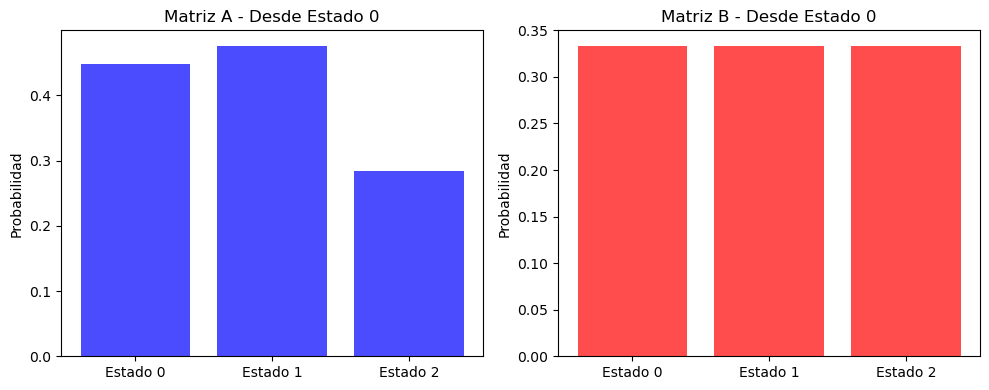

In [209]:
def transiciones_al_azar_continuas(n):
    res = []
    for i in range(n): 
        v = []
        for j in range(n): 
            v.append(np.random.rand()) 
        res.append(v) # armo matriz random con numeros entre 0 y 1 
        
    res_t = traspuesta(res) # necesito que las columnas sumen 1 => sean vectores verti
    res_t_norm = []
    
    for s in range(len(res_t)):
        col = res_t[s]
        n_val = norma(col, 1)
        if n_val < 1e-12:
            col_n = [1.0/n for _ in col] 
        else: 
            col_n = []
            for elemento in col:
                elemento_normalizado = elemento / n_val
                col_n.append(elemento_normalizado)
        res_t_norm.append(col_n) 
    res = traspuesta(res_t_norm) 
    return np.array(res) 
        
def transiciones_al_azar_uniformes(n,thres):
    matriz = []
    for i in range(n):
        fila = []
        for j in range(n): 
            if np.random.rand() > thres: 
                fila.append(1) 
            else:  
                fila.append(0)
        matriz.append(fila)
        
    matriz_T = traspuesta(matriz) 
    matriz_T_norm = []
    
    for s in range(len(matriz_T)):
        col = matriz_T[s]
        n_val = norma(col, 1)
        
        if n_val < 1e-12:
            col_n = [1.0/n for _ in range(len(col))] 
        else: 
            col_n = []
            for elemento in col:
                elemento_normalizado = elemento / n_val
                col_n.append(elemento_normalizado)
        matriz_T_norm.append(col_n) 
        
    res = traspuesta(matriz_T_norm) 
    return np.array(res) 
    
print(transiciones_al_azar_uniformes(6, 0.01))
    

def nucleo(A, tol=1e-8):
    A = np.array(A, dtype=float)

    T = traspuesta(A) 
    ATA = T @ A # hacer funcion girl 
    S, D = diagRH(ATA, tol, 1000) 

    i_v = []
    for i in range(len(D)):
        if np.abs(D[i][i]) < tol:
            i_v.append(i) 

    k = len(i_v) # cantidad de vectores en el nucleo
    if k == 0: # caso identidad 
        return np.zeros((0,n))
    else: 
        res = S[:, i_v]  
    
        return res

#print(A2.tolist(), A2[0][1], A2[1][0])


def puntos_fijos(T, tol): 
    m = nucleo(T, tol)
    if len(m) == 0:
        return np.array([])
    m_n = []
    for i in range(len(m)):
        v = m[i]
        norma = norma(v, 1)
        if norma > 1e-12:
            v_n = [x / norma for x in v]
            m_n.append(v_n)
    
    return np.array(m_n)

A = transiciones_al_azar_continuas(3)
print(A, A[0][0])
B = transiciones_al_azar_uniformes(3, 0.01)
print(B)
# no entiendo la tercera 

estados = ['Estado 0', 'Estado 1', 'Estado 2']
    
plt.figure(figsize=(10, 4))
    
plt.subplot(1, 2, 1)
plt.bar(estados, A[0], color='blue', alpha=0.7)
plt.title('Matriz A - Desde Estado 0')
plt.ylabel('Probabilidad')
    
plt.subplot(1, 2, 2)
plt.bar(estados, B[0], color='red', alpha=0.7)
plt.title('Matriz B - Desde Estado 0')
plt.ylabel('Probabilidad')
    
plt.tight_layout()
plt.show()


def crea_rala(listado,m_filas,n_columnas,tol=1e-15):
    if len(listado) == 0:
        return {}, (m_filas, n_columnas)
    lista_i, lista_j, lista_aij = listado
    d = {} 
    
    for i in range(len(lista_i)):
        if abs(lista_aij[i]) >= tol: 
            fila = lista_i[i]
            columna = lista_j[i]
            valor = lista_aij[i]
            d[(fila, columna)] = valor  # {(i,j): A_ij}
    
    return d, (m_filas, n_columnas) 

def multiplica_rala_vector(A,v): 
    A_dict, dims = A 
    m_filas, n_columnas = dims 

    resultado = np.zeros(m_filas) 
    
    for (i, j), valor in A_dict.items():
        resultado[i] += valor * v[j]
    
    return resultado
    

# Modulo 8 

In [212]:

# ejercicio 1 
def svd_reducida_1(A, tol=1e-15):
    A = np.array(A, dtype=float) 
    m, n = A.shape 

    if m >= n:
        ATA = A.T @ A
        V, D = diagRH(ATA, tol, 1000) 
        E = np.diag(np.sqrt(np.abs(D)))

        idx = np.argsort(E)[::-1] # ordeno al reves 
        E = E[idx]
        V = V[:, idx]

        r = np.sum(E > tol) # saco los menores a tol
        E = E[:r]
        V = V[:, :r]
         
        B = A @ V
        U, R = calculaQR(B, tol=tol)
                
        return U, E, V
    else: 
        V, E, U = svd_reducida_1(A.T, tol=tol)
        
        return U, E, V

# ejercicio 2
def svd_completa(A, tol=1e-15):
    A = np.array(A, dtype=float) 
    m, n = A.shape
    
    if m <= n:
        ATA = A.T @ A 
        V, D = diagRH(ATA, tol, 1000) 
        E = np.diag(np.sqrt(np.abs(D)))

        U = A @ V.T
        
        for i in range(len(E)):
            if E[i] > tol:
                U[:, i] = U[:, i] / E[i]
        
        if U.shape[1] < m:
            Q, R = calculaQR(U, tol)
            U = Q

        return U, E, V
    else: 
        U, E, V = svd_completa(A.T, tol)
        return V.T, E, U.T
        
# ejercicio 3 
def svd_reducida(A, k='max',tol=1e-15):
    A = np.array(A, dtype=float) 
    m, n = A.shape
    
    if k == 'max':
        U, E, V = svd_reducida_1(A, tol)
        
        return -U, E, -V
    
    else: 
        
        if k <= 0:
            return (np.array([]).reshape(m, 0), 
                    np.array([]), 
                    np.array([]).reshape(n, 0))    
            
        U, E, V = svd_completa(A, tol)
        r = len(E)
        k = min(k, r)

        if k > r: 
            return svd_reducida_1(A, tol)
            
        else: 
            U_r = U[:, :k]
            E_r = E[:k]
            V_r = V[:,:k]
            return U_r, E_r, V_r
        

# Test 

In [105]:
#%% 1er Test 

def sonIguales(x,y,atol=1e-08):
    return np.allclose(error(x,y),0,atol=atol)

assert(not sonIguales(1,1.1))
assert(sonIguales(1,1 + np.finfo('float64').eps))
assert(not sonIguales(1,1 + np.finfo('float32').eps))
assert(not sonIguales(np.float16(1),np.float16(1) + np.finfo('float32').eps))
assert(sonIguales(np.float16(1),np.float16(1) + np.finfo('float16').eps,atol=1e-3))

assert(np.allclose(error_relativo(1,1.1),0.1))
assert(np.allclose(error_relativo(2,1),0.5))
assert(np.allclose(error_relativo(-1,-1),0))
assert(np.allclose(error_relativo(1,-1),2))

assert(matricesIguales(np.diag([1,1]),np.eye(2)))
assert(not matricesIguales(np.array([[1,2],[3,4]]).T,np.array([[1,2],[3,4]]))) 
assert(matricesIguales(np.linalg.inv(np.array([[1,2],[3,4]]))@np.array([[1,2],[3,4]]),np.eye(2)))
print('1er test okey') 

1er test okey


In [107]:
#%% 2do Test 
#Tests para rota
assert(np.allclose(rota(0) , np.eye(2)))
assert(np.allclose(rota(np.pi/2), np.array([[0, -1],[1, 0]])))
assert(np.allclose(rota(np.pi), np.array([[-1, 0] ,[0, -1]])))

#Tests para escala
assert(np.allclose(escala([2,3]) , np.array([[2 ,0] ,[0 ,3]])))
assert(np.allclose(escala([1,1,1]) , np.eye(3)))
assert(
np.allclose(escala([0.5,0.25]) , np.array([[0.5 ,0] ,[0 ,0.25]]))
)

#Tests para rota y escala
assert(np.allclose(rota_y_escala(0,[2,3]) , np.array([[2 ,0] ,[0 ,3]])))
assert(np.allclose(rota_y_escala(np.pi/2,[1,1]) , np.array([[0,-1] ,[1,0]])))
assert(np.allclose(rota_y_escala(np.pi ,[2,2]) , np.array([[-2,0] ,[0,-2]])))

#Tests para afin
assert(np.allclose(afin(0,[1,1] ,[1,2]) ,np.array([[1,0,1] ,[0,1,2] ,[0,0,1]])))
assert(np.allclose(afin(np.pi/2,[1,1] ,[0,0]) ,np.array([[0,-1,0] ,[1, 0,0] ,[0, 0,1]])))
assert(np.allclose(afin(0,[2,3] ,[1,1]) ,np.array([[2,0,1] ,[0,3,1] ,[0,0,1]])))

#Tests para trans afin
assert(np.allclose(trans_afin(np.array([1,0]) , np.pi/2,[1,1] ,[0,0]) ,np.array([0,1])))
assert(np.allclose(trans_afin(np.array([1,1]) , 0,[2,3] ,[0,0]) ,np.array([2,3])))
assert(np.allclose(trans_afin(np.array([1,0]),np.pi/2,[3,2] ,[4,5]), np.array([4,7]))) # este no me pasaba el test, segun el discord de la materia hay que cambiar el numerito 
#print(trans_afin(np.array([1,0]),np.pi/2,[3,2] ,[4,5]))
#print(rota(np.pi/2), escala([3,2]))
print('2do test okey') 

2do test okey


In [111]:
# Tests L03-Normas

# Tests norma
assert(np.allclose(norma(np.array([1,1]),2),np.sqrt(2)))
assert(np.allclose(norma(np.array([1]*10),2),np.sqrt(10)))
assert(norma(np.random.rand(10),2)<=np.sqrt(10))
assert(norma(np.random.rand(10),2)>=0)

# Tests normaliza
for x in normaliza([np.array([1]*k) for k in range(1,11)],2):
    assert(np.allclose(norma(x,2),1))
for x in normaliza([np.array([1]*k) for k in range(2,11)],1):
    print(not np.allclose(norma(x,2),1) )
for x in normaliza([np.random.rand(k) for k in range(1,11)],'inf'):
    assert( np.allclose(norma(x,'inf'),1) )

# Tests normaExacta
assert(np.allclose(normaExacta(np.array([[1,-1],[-1,-1]]),1),2))
assert(np.allclose(normaExacta(np.array([[1,-2],[-3,-4]]),1),7))
assert(np.allclose(normaExacta(np.array([[1,-2],[-3,-4]]),'inf'),6))
assert(normaExacta(np.array([[1,-2],[-3,-4]]),2) is None)
assert(normaExacta(np.random.random((10,10)),1)<=10)
assert(normaExacta(np.random.random((4,4)),'inf')<=4)

# Test normaMC

nMC = normaMatMC(A=np.eye(2),q=2,p=1,Np=100000)
assert(np.allclose(nMC[0],1,atol=1e-3))
assert(np.allclose(np.abs(nMC[1][0]),1,atol=1e-3) or np.allclose(np.abs(nMC[1][1]),1,atol=1e-3))
assert(np.allclose(np.abs(nMC[1][0]),0,atol=1e-3) or np.allclose(np.abs(nMC[1][1]),0,atol=1e-3))

nMC = normaMatMC(A=np.eye(2),q=2,p='inf',Np=100000)
assert(np.allclose(nMC[0],np.sqrt(2),atol=1e-3))
assert(np.allclose(np.abs(nMC[1][0]),1,atol=1e-3) and np.allclose(np.abs(nMC[1][1]),1,atol=1e-3))

A = np.array([[1,2],[3,4]])
nMC = normaMatMC(A=A,q='inf',p='inf',Np=1000000)
assert(np.allclose(nMC[0],normaExacta(A,'inf'),rtol=2e-1)) 
print('3er Test okey')

True
True
True
True
True
True
True
True
True
3er Test okey


In [113]:
# Test condExacta
A = np.random.rand(10,10)
A_ = np.linalg.solve(A,np.eye(A.shape[0]))
normaA = normaExacta(A,1)
normaA_ = normaExacta(A_,1)
condA = condExacta(A,1)
assert(np.allclose(normaA*normaA_,condA))

A = np.random.rand(10,10)
A_ = np.linalg.solve(A,np.eye(A.shape[0]))
normaA = normaExacta(A,'inf')
normaA_ = normaExacta(A_,'inf')
condA = condExacta(A,'inf')
assert(np.allclose(normaA*normaA_,condA))

print('test CondExacta okey')

test CondExacta okey


In [115]:
# Test condMC

A = np.array([[1,1],[0,1]])
A_ = np.linalg.solve(A,np.eye(A.shape[0]))
normaA = normaMatMC(A,2,2,10000)
normaA_ = normaMatMC(A_,2,2,10000)
condA = condMC(A,2,10000)
assert(np.allclose(normaA[0]*normaA_[0],condA,atol=1e-3))

A = np.array([[3,2],[4,1]])
A_ = np.linalg.solve(A,np.eye(A.shape[0]))
normaA = normaMatMC(A,2,2,10000)
normaA_ = normaMatMC(A_,2,2,10000)
condA = condMC(A,2,10000)
assert(np.allclose(normaA[0]*normaA_[0],condA,atol=1e-3))
print('test condMC okey')

test condMC okey


In [117]:

# Tests LU

L0 = np.array([[1,0,0],[0,1,0],[1,1,1]])
U0 = np.array([[10,1,0],[0,2,1],[0,0,1]])
A =  L0 @ U0
L,U,nops = calculaLU(A)
assert(np.allclose(L,L0))
assert(np.allclose(U,U0))


L0 = np.array([[1,0,0],[1,1.001,0],[1,1,1]])
U0 = np.array([[1,1,1],[0,1,1],[0,0,1]])
A =  L0 @ U0
L,U,nops = calculaLU(A)
assert(not np.allclose(L,L0))
assert(not np.allclose(U,U0))
assert(np.allclose(L,L0,atol=1e-3))
assert(np.allclose(U,U0,atol=1e-3))
assert(nops == 13)

L0 = np.array([[1,0,0],[1,1,0],[1,1,1]])
U0 = np.array([[1,1,1],[0,0,1],[0,0,1]])
A =  L0 @ U0
L,U,nops = calculaLU(A)
assert(L is None)
assert(U is None)
assert(nops == 0)


## Tests res_tri

A = np.array([[1,0,0],[1,1,0],[1,1,1]])
b = np.array([1,1,1])
assert(np.allclose(res_tri(A,b),np.array([1,0,0])))
b = np.array([0,1,0])
assert(np.allclose(res_tri(A,b),np.array([0,1,-1])))
b = np.array([-1,1,-1])
assert(np.allclose(res_tri(A,b),np.array([-1,2,-2])))
b = np.array([-1,1,-1])
assert(np.allclose(res_tri(A,b,inferior=False),np.array([-1,1,-1])))

A = np.array([[3,2,1],[0,2,1],[0,0,1]])
b = np.array([3,2,1])
assert(np.allclose(res_tri(A,b,inferior=False),np.array([1/3,1/2,1])))

A = np.array([[1,-1,1],[0,1,-1],[0,0,1]])
b = np.array([1,0,1])
assert(np.allclose(res_tri(A,b,inferior=False),np.array([1,1,1])))

# Test inversa

ntest = 10
iter = 0
while iter < ntest:
    A = np.random.random((4,4))
    A_ = inversa(A)
    if not A_ is None:
        assert(np.allclose(np.linalg.inv(A),A_))
        iter += 1

# Matriz singular devería devolver None
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
assert(inversa(A) is None)


# Test LDV:

L0 = np.array([[1,0,0],[1,1.,0],[1,1,1]])
D0 = np.diag([1,2,3])
V0 = np.array([[1,1,1],[0,1,1],[0,0,1]])
A =  L0 @ D0  @ V0
L,D,V,nops = calculaLDV(A)
assert(np.allclose(L,L0))
assert(np.allclose(D,D0))
assert(np.allclose(V,V0))

L0 = np.array([[1,0,0],[1,1.001,0],[1,1,1]])
D0 = np.diag([3,2,1])
V0 = np.array([[1,1,1],[0,1,1],[0,0,1.001]])
A =  L0 @ D0  @ V0
L,D,V,nops = calculaLDV(A)
assert(np.allclose(L,L0,1e-3))
assert(np.allclose(D,D0,1e-3))
assert(np.allclose(V,V0,1e-3))


# Tests SDP

L0 = np.array([[1,0,0],[1,1,0],[1,1,1]])
D0 = np.diag([1,1,1])
A = L0 @ D0 @ L0.T
assert(esSDP(A))

D0 = np.diag([1,-1,1])
A = L0 @ D0 @ L0.T
assert(not esSDP(A))


D0 = np.diag([1,1,1e-16])
A = L0 @ D0 @ L0.T
assert(not esSDP(A)) 

L0 = np.array([[1,0,0],[1,1,0],[1,1,1]])
D0 = np.diag([1,1,1])
V0 = np.array([[1,0,0],[1,1,0],[1,1+1e-10,1]]).T
A = L0 @ D0 @ V0
assert(not esSDP(A))
print('pasaron los test del 5to')

pasaron los test del 5to


In [119]:

# --- Matrices de prueba ---
A2 = np.array([[1., 2.],
               [3., 4.]])

A3 = np.array([[1., 0., 1.],
               [0., 1., 1.],
               [1., 1., 0.]])

A4 = np.array([[2., 0., 1., 3.],
               [0., 1., 4., 1.],
               [1., 0., 2., 0.],
               [3., 1., 0., 2.]])

# --- Funciones auxiliares para los tests ---
def check_QR(Q,R,A,tol=1e-10):
    # Comprueba ortogonalidad y reconstrucción
    assert np.allclose(Q.T @ Q, np.eye(Q.shape[1]), atol=tol)
    assert np.allclose(Q @ R, A, atol=tol)

# --- TESTS PARA QR_by_GS2 ---
Q2,R2 = QR_con_GS(A2)
check_QR(Q2,R2,A2)

Q3,R3 = QR_con_GS(A3)
check_QR(Q3,R3,A3)

Q4,R4 = QR_con_GS(A4)
check_QR(Q4,R4,A4)

# --- TESTS PARA QR_by_HH ---
Q2h,R2h = QR_con_GS(A2)
check_QR(Q2h,R2h,A2)

Q3h,R3h = QR_con_HH(A3)
check_QR(Q3h,R3h,A3)

Q4h,R4h = QR_con_HH(A4)
check_QR(Q4h,R4h,A4)


# --- TESTS PARA calculaQR ---
Q2c,R2c = calculaQR(A2,metodo='RH')
check_QR(Q2c,R2c,A2)

Q3c,R3c = calculaQR(A3,metodo='GS')
check_QR(Q3c,R3c,A3)

Q4c,R4c = calculaQR(A4,metodo='RH')
check_QR(Q4c,R4c,A4)

print('todo ok qr')

todo ok qr


In [121]:
# Tests metpot2k

S = np.vstack([
    np.array([2,1,0])/np.sqrt(5),
    np.array([-1,2,5])/np.sqrt(30),
    np.array([1,-2,1])/np.sqrt(6)
              ]).T

# Pedimos que pase el 95% de los casos
exitos = 0
for i in range(100):
    D = np.diag(np.random.random(3)+1)*100
    A = S@D@S.T
    v,l,_ = metpot2k(A,1e-15,1e5)
    if np.abs(l - np.max(D))< 1e-8:
        exitos += 1
assert exitos > 95

print('paso el test de mepot')

paso el test de mepot


In [123]:
#Test con HH
exitos = 0
for i in range(100):
    v = np.random.rand(9)
    #v = np.abs(v)
    #v = (-1) * v
    ixv = np.argsort(-np.abs(v))
    D = np.diag(v[ixv])
    I = np.eye(9)
    H = I - 2*np.outer(v.T, v)/(np.linalg.norm(v)**2)   #matriz de HouseHolder

    A = H@D@H.T
    v,l,_ = metpot2k(A, 1e-15, 1e5)
    #max_eigen = abs(D[0][0])
    if abs(l - D[0,0]) < 1e-8:         
        exitos +=1
assert exitos > 95

print('listo diag con metpot') 

listo diag con metpot


# TEST 7

In [58]:
# Test 7 

def es_markov(T,tol=1e-6):
    """
    T una matriz cuadrada.
    tol la tolerancia para asumir que una suma es igual a 1.
    Retorna True si T es una matriz de transición de Markov (entradas no negativas y columnas que suman 1 dentro de la tolerancia), False en caso contrario.
    """
    n = T.shape[0]
    for i in range(n):
        for j in range(n):
            if T[i,j]<0:
                return False
    for j in range(n):
        suma_columna = sum(T[:,j])
        if np.abs(suma_columna - 1) > tol:
            return False
    return True

def es_markov_uniforme(T,thres=1e-6):
    """
    T una matriz cuadrada.
    thres la tolerancia para asumir que una entrada es igual a cero.
    Retorna True si T es una matriz de transición de Markov uniforme (entradas iguales a cero o iguales entre si en cada columna, y columnas que suman 1 dentro de la tolerancia), False en caso contrario.
    """
    if not es_markov(T,thres):
        return False
    # cada columna debe tener entradas iguales entre si o iguales a cero
    m = T.shape[1]
    for j in range(m):
        non_zero = T[:,j][T[:,j] > thres]
        # all close
        close = all(np.abs(non_zero - non_zero[0]) < thres)
        if not close:
            return False
    return True


def esNucleo(A,S,tol=1e-5):
    """
    A una matriz m x n
    S una matriz n x k
    tol la tolerancia para asumir que un vector esta en el nucleo.
    Retorna True si las columnas de S estan en el nucleo de A (es decir, A*S = 0. Esto no chequea si es todo el nucleo
    """
    for col in S.T:
        res = A @ col
        if not np.allclose(res,np.zeros(A.shape[0]), atol=tol):
            return False
    return True

## TESTS
# transiciones_al_azar_continuas
# transiciones_al_azar_uniformes
for i in range(1,100):
    T = transiciones_al_azar_continuas(i)
    assert es_markov(T), f"transiciones_al_azar_continuas fallo para n={i}"
    
    T = transiciones_al_azar_uniformes(i,0.3)
    assert es_markov_uniforme(T), f"transiciones_al_azar_uniformes fallo para n={i}"
    # Si no atajan casos borde, pueden fallar estos tests. Recuerden que suma de columnas DEBE ser 1, no valen columnas nulas.
    T = transiciones_al_azar_uniformes(i,0.01)
    assert es_markov_uniforme(T), f"transiciones_al_azar_uniformes fallo para n={i}"
    T = transiciones_al_azar_uniformes(i,0.01)
    assert es_markov_uniforme(T), f"transiciones_al_azar_uniformes fallo para n={i}"
    
# nucleo
A = np.eye(3)
S = nucleo(A)
assert S.shape[0]==0, "nucleo fallo para matriz identidad"
A[1,1] = 0
S = nucleo(A)
msg = "nucleo fallo para matriz con un cero en diagonal"
assert esNucleo(A,S), msg
assert S.shape==(3,1), msg
assert abs(S[2,0])<1e-2, msg
assert abs(S[0,0])<1e-2, msg

v = np.random.random(5)
v = v / np.linalg.norm(v)
H = np.eye(5) - np.outer(v, v)  # proyección ortogonal
S = nucleo(H)
msg = "nucleo fallo para matriz de proyeccion ortogonal"
assert S.shape==(5,1), msg
v_gen = S[:,0]
v_gen = v_gen / np.linalg.norm(v_gen)
assert np.allclose(v, v_gen) or np.allclose(v, -v_gen), msg

# crea rala
listado = [[0,17],[3,4],[0.5,0.25]]
A_rala_dict, dims = crea_rala(listado,32,89)
assert dims == (32,89), "crea_rala fallo en dimensiones"
assert A_rala_dict[(0,3)] == 0.5, "crea_rala fallo"
assert A_rala_dict[(17,4)] == 0.25, "crea_rala fallo"
assert len(A_rala_dict) == 2, "crea_rala fallo en cantidad de elementos"

listado = [[32,16,5],[3,4,7],[7,0.5,0.25]]
A_rala_dict, dims = crea_rala(listado,50,50)
assert dims == (50,50), "crea_rala fallo en dimensiones con tol"
assert A_rala_dict.get((32,3)) == 7
assert A_rala_dict[(16,4)] == 0.5
assert A_rala_dict[(5,7)] == 0.25

listado = [[1,2,3],[4,5,6],[1e-20,0.5,0.25]]
A_rala_dict, dims = crea_rala(listado,10,10)
assert dims == (10,10), "crea_rala fallo en dimensiones con tol"
assert (1,4) not in A_rala_dict
assert A_rala_dict[(2,5)] == 0.5
assert A_rala_dict[(3,6)] == 0.25
assert len(A_rala_dict) == 2

# caso borde: lista vacia. Esto es una matriz de 0s
listado = []
A_rala_dict, dims = crea_rala(listado,10,10)
assert dims == (10,10), "crea_rala fallo en dimensiones con lista vacia"
assert len(A_rala_dict) == 0, "crea_rala fallo en cantidad de elementos con lista vacia"

# multiplica rala vector
listado = [[0,1,2],[0,1,2],[1,2,3]]
A_rala = crea_rala(listado,3,3)
v = np.random.random(3)
v = v / np.linalg.norm(v)
res = multiplica_rala_vector(A_rala,v)
A = np.array([[1,0,0],[0,2,0],[0,0,3]])
res_esperado = A @ v
assert np.allclose(res,res_esperado), "multiplica_rala_vector fallo"

A = np.random.random((5,5))
A = A * (A > 0.5) 
listado = [[],[],[]]
for i in range(5):
    for j in range(5):
        listado[0].append(i)
        listado[1].append(j)
        listado[2].append(A[i,j])
        
A_rala = crea_rala(listado,5,5)
v = np.random.random(5)
assert np.allclose(multiplica_rala_vector(A_rala,v), A @ v)
print('ok')

ok


# TEST 8 

In [246]:
# Matrices al azar
def genera_matriz_para_test(m,n=2,tam_nucleo=0):
    if tam_nucleo == 0:
        A = np.random.random((m,n))
    else:
        A = np.random.random((m,tam_nucleo))
        A = np.hstack([A,A])
    return(A)

def test_svd_reducida_mn(A,tol=1e-15):
    m,n = A.shape
    hU,hS,hV = svd_reducida(A,tol=tol)
    nU,nS,nVT = np.linalg.svd(A)
    r = len(hS)+1
    assert np.all(np.abs(np.abs(np.diag(hU.T @ nU))-1)<10**r*tol), 'Revisar calculo de hat U en ' + str((m,n))
    assert np.all(np.abs(np.abs(np.diag(nVT @ hV))-1)<10**r*tol), 'Revisar calculo de hat V en ' + str((m,n))
    assert len(hS) == len(nS[np.abs(nS)>tol]), 'Hay cantidades distintas de valores singulares en ' + str((m,n))
    assert np.all(np.abs(hS-nS[np.abs(nS)>tol])<10**r*tol), 'Hay diferencias en los valores singulares en ' + str((m,n))
#,5,10,20
for m in [2,5,10,20]:
    for n in [2,5,10,20]:
        for _ in range(10):
        #    if m == 5 and n == 10:
               A = genera_matriz_para_test(m,n)
               test_svd_reducida_mn(A)
               #print('ok' + str((m,n)))
              # print('mi funcion', svd_reducida(A, tol=1e-15), 'test', np.linalg.svd(A, full_matrices=False))

#print('ok ejercicio')

# Matrices con nucleo
m = 12
for tam_nucleo in [2]:
   # for _ in range(10):
        A = genera_matriz_para_test(m,tam_nucleo=tam_nucleo)
        test_svd_reducida_mn(A)
# Tamaños de las reducidas
A = np.random.random((8,6)) 
for k in [1,3,5]:
    hU,hS,hV = svd_reducida(A,k=k)
    assert hU.shape[0] == A.shape[0], 'Dimensiones de hU incorrectas (caso a)'
    assert hV.shape[0] == A.shape[1], 'Dimensiones de hV incorrectas(caso a)'
    assert hU.shape[1] == k, 'Dimensiones de hU incorrectas (caso a)'
    assert hV.shape[1] == k, 'Dimensiones de hV incorrectas(caso a)'
    assert len(hS) == k, 'Tamaño de hS incorrecto'


AssertionError: Revisar calculo de hat U en (12, 4)